### **Exercise1:**

Plot a rainbow

In [94]:
from matplotlib import pyplot as plt
import numpy as np
import math

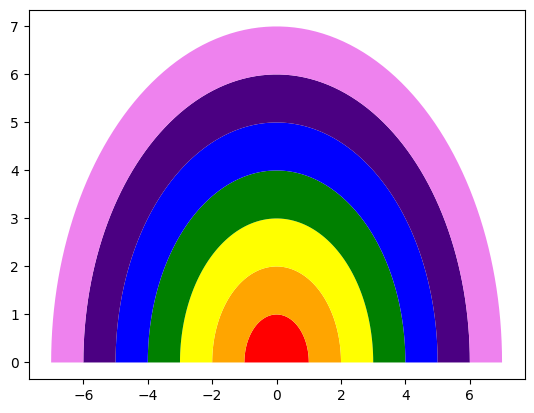

In [95]:
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i in range(7):
    radii = [i, i+1]
    theta = np.linspace(0, np.pi, 100, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))

    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    plt.fill(np.ravel(xs), np.ravel(ys), color = colors[i], linewidth=0) 

### **Exercise2:**

Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

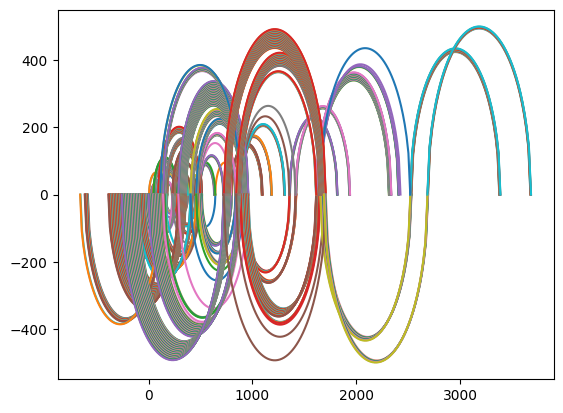

In [212]:
def semicircle(x1,x2,up=[True, False]):
    a = min(x1,x2)
    b = max(x1,x2)
    radius = (b-a)/2
    center = a + radius

    x = np.linspace(a,b,50)
    y = np.sqrt(radius**2 - (x-center)**2)
    if up==True:
        plt.plot(x,y)
    else:
        plt.plot(x,-y)



def recaman1(N):
    seq = set()
    final = list() # need this because set sort its element
    if N==0:
        seq.add(0)
        final.append(0)
    else:
        a = 0
        n = 0
        while n<N:
            diff = a - n
            if (diff > 0) and (diff not in seq):
                semicircle(a,diff,True)
                a = diff
            else:
                semicircle(a,diff,False)
                a = a + n
            seq.add(a)
            final.append(a)
            n = n + 1    
    return

recaman1(1000)

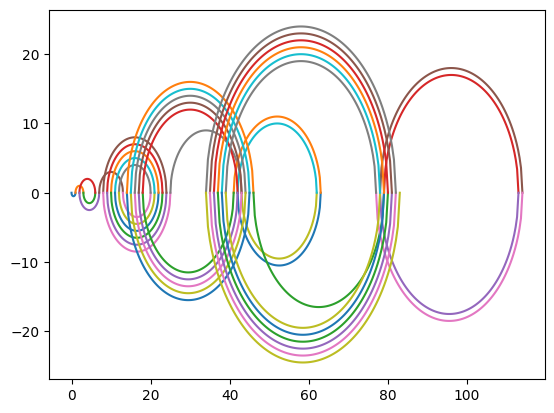

In [214]:
def recaman1(N):
    seq = set()
    final = list() # need this because set sort its element
    if N==0:
        seq.add(0)
        final.append(0)
    else:
        a = 0
        n = 0
        while n<N:
            diff = a - n
            if (diff > 0) and (diff not in seq):
                a = diff
            else:
                a = a + n
            seq.add(a)
            final.append(a)
            n = n + 1    
    return final
seq = recaman1(50)
for i in range(1, len(seq)):
    h = (seq[i] + seq[i-1])/2
    r = abs((seq[i] - seq[i-1]))/2
    x = np.linspace(seq[i], seq[i-1], 100)
    y = (-1)**i * np.sqrt(r**2 - (x-h)**2)
    plt.plot(x, y)

### **Exercise3:**

Write a matrix multiplication fucntion using lists ("manually", like you did in c++) and another one using numpy arrays (call matmul function). Time them both. 

In [137]:
def matrix_mult(A,B):
    if np.asarray(A).shape != np.asarray(B).shape:
        print("error: different size")
        return
    elif np.asarray(A).shape[0] != np.asarray(A).shape[1]:
        print("error: enter square matrix")
        return
    else:
        n = np.asarray(A).shape[0]

        C = [ [0]*n for i in range(n)]
        for i in range(n):
            for j in range(n):
                sum = 0
                for k in range(n):
                    sum = sum + A[i][k]*B[k][j]
                C[i][j] = sum
    return C

def matrix_mult_quick(A,B):
    A = np.asarray(A)
    B = np.asarray(B)
    if A.shape != B.shape:
        print("error: different size")
        return
    elif A.shape[0] != B.shape[1]:
        print("error: enter square matrix")
        return
    return np.matmul(A,B)



A = [[1,0,0],[0,1,0],[0,0,1]]
B = [[2,5,7],[43,72,5],[0,0,0]]

matrix_mult(A,B)
matrix_mult_quick(A,B)

array([[ 2,  5,  7],
       [43, 72,  5],
       [ 0,  0,  0]])

In [141]:
A = [[i for i in range(100)] for j in range(100)]
B = [[1 for i in range(100)] for j in range(100)]

In [142]:
%%timeit
matrix_mult(A,B)

67.2 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [143]:
%%timeit
matrix_mult_quick(A,B)

1.28 ms ± 189 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### **Exercise4:**

Read the "extra exercise from c++" about the Jacobi method to solve the Laplace equation. Implement the solver (without defining a class and just using numpy aray as a mesh) for the equation with the same boundary conditions. Try to get the same final picture and gif as the c++ version. Hint: you can plot a matrix with plt.imshow(MATRIX_TO_PLOT). The gif creation example scipt is in the file `anym.py` (not in the Jupyterlab as it has troubles displaying and sometimes even producing gifs, rememeber that you can export your notebooks into `.py` files by `Files->Export Notebook as... -> Export Notebook as executable script`)

In [11]:
import numpy as np
import math

def build_grid(N):
    N_star = N+2
    grid = np.empty(N_star*N_star)
    new_grid = np.empty(N_star*N_star)
    K = 100.0/(N_star - 1)

    ##set inner grid to 0.5
    for i in range(N_star*N_star):
        grid[i] = 0.5
        new_grid[i] = 0.5

    ## set boundaries
    for i in range(N_star):
        grid[N_star*(N_star -1) + i] = 100 - K*i
        grid[N_star*(N_star -1) - i*N_star] = 100 - K*i
        grid[i] = 0
        grid[N_star - 1 + i*(N_star)] = 0

        new_grid[N_star*(N_star -1) + i] = 100 - K*i
        new_grid[N_star*(N_star -1) - i*N_star] = 100 - K*i
        new_grid[i] = 0
        new_grid[N_star - 1 + i*(N_star)] = 0
    return grid

print(len(build_grid(2)))
    

16


In [29]:
def print_grid(grid):
    N_star = int(math.sqrt(len(grid)))
    return [ grid[N_star*i + j] for i in range(1, N_star -1) for j in range(1, N_star -1) ]

In [30]:
def solver(grid):
    N_star = int(math.sqrt(len(grid)))
    new_grid = np.empty(N_star*N_star)
    for i in range(1, N_star -1):
        for j in range(1, N_star -1):
                new_grid[N_star*i + j] = 0.25*(grid[N_star*(i-1) + j] + grid[N_star*i + j + 1] + grid[N_star*i + j - 1] + grid[N_star*(i+1) + j])
    return new_grid

In [40]:
N = 2

grd = build_grid(N)

print(solver(grd))


[  0.           0.           0.           0.          33.33333333
   8.58333333   0.25         0.          66.66666667  33.58333333
   8.58333333   0.         100.          66.66666667  33.33333333
   0.        ]


In [43]:
N = 100
N_star = N+2
image = np.reshape(build_grid(N), (N_star,N_star))
final = np.array([image[i, :] for i in range(N_star)])

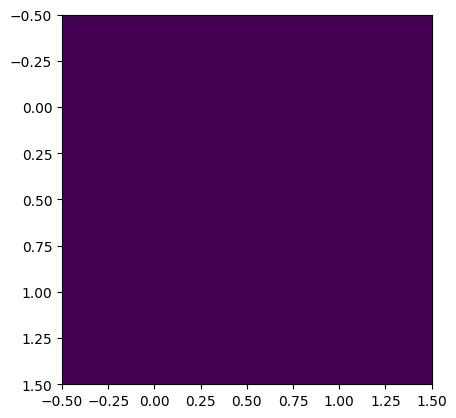

In [35]:
from matplotlib import pyplot as plt
plt.imshow(np.reshape(grd, (N, N)))

### **Exercise5:**
Implement [Conway's game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy array to hold data and animation technique from the previous exercise (or any other if you know it).

Any live cell with two or three live neighbours survives.
Any dead cell with three live neighbours becomes a live cell.
All other live cells die in the next generation. Similarly, all other dead cells stay dead.

In [48]:
def find_neigh(i,j,n,m):
    # i is row index in the grid
    # j is col index in the grid
    # n is col size in the grid
    # m is row index in the grid
    if i>=n or j>=m:
        print("error")
        return
    else:
        if i > 0 and i < n-1 and j > 0 and j < m-1:
            return list([[i+1,j+1],[i+1,j],[i+1,j-1],[i,j-1],[i-1,j-1],[i-1,j],[i-1,j+1],[i,j+1]])
        elif i == 0 and j == 0:
            return [[i+1,j],[i+1,j+1],[i,j+1]]
        elif i == 0 and j == m-1:
            return [[i+1,j],[i+1,j-1],[i,j-1]]
        elif (i == n-1) and (j == m-1):
            return [[i-1,j],[i-1,j-1],[i,j-1]]
        elif i == n-1 and j == 0:
            return [[i-1,j],[i-1,j+1],[i,j+1]]
        elif i == 0 :
            return [[i,j+1],[i+1,j+1],[i+1,j],[i+1,j-1],[i,j-1]]
        elif j == m-1:
            return [[i+1,j],[i+1,j-1],[i,j-1],[i-1,j-1],[i-1,j]]
        elif i == n-1:
            return [[i,j+1],[i-1,j+1],[i-1,j],[i-1,j-1],[i,j-1]]
        elif j == 0:
            return [[i+1,j],[i+1,j+1],[i,j+1],[i-1,j+1],[i-1,j]]


def next_iteration(current_state):
    n = int(np.shape(current_state)[0])
    m = int(np.shape(current_state)[1])
    next_state = current_state.copy()
    for i in range(n):
        for j in range(m):
            neigh = find_neigh(i,j,n,m)
            count = 0
            for ne in neigh:
                k = ne[0]
                h = ne[1]
                if current_state[k,h] == 1: # se è vivo
                    count = count + 1
            if current_state[i,j] == 1:
                if (count<2) or (count>3):
                    next_state[i,j] = 0
            else:
                if count == 3:
                    next_state[i,j] = 1
    
    return next_state

def plot_grid(state):
    plt.imshow(state)

images=[]
def game_of_life(initial_state, number_of_it):
    k=0
    current = initial_state
    while np.sum(current)!=0 and k<number_of_it:
        current = next_iteration(current)
        #print(current)
        curr_img = plot_grid(current)
        images.append(curr_img)
        k = k+1

import matplotlib.animation as animation

# Create a function to update the image for each frame of the animation
def update_frame(i):
    plt.imshow(images[i])
    return

# Create the animation
fig = plt.figure()
ani = animation.FuncAnimation(fig, update_frame, frames=len(images), interval=200)

# Save the animation as a gif
ani.save('animation.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/animation.py:1713: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

### **Exercise6 (for those from data science following statistics course):**

Choose some howework from the statistics course that you've done in R and try to rewrite it using numpy.